In [38]:
import timeit

# Show me the Money

Assume that you have access to 900,000 bank accounts belonging to other people. Assume that the account balances are uniformly distributed between \\$100 and \\$100,000. The interest rate for all the accounts is 5%, compounded daily. [Daily compounding](https://www.eduworks.com/Documents/Workshops/EdMedia1998/class/compound.htm) generally means that the stated annual rate is applied daily (also: [Daily compounding](https://www.cuemath.com/daily-compound-interest-formula/)) $\frac{5\%}{365}=0.01369\%$ per day. 
The interest is added to the balance of each account, with the exception that the fractions of cents (anything past the third decimal place) that are truncated (dropped), this dropped value is what we are going to skim (steal). 

Let's pretend we are online robbers and we want to write some code to skim the excesss interest and place it into our own account. 
We are going to illegally skim the fractions that get truncated (dropped) out of the other people's accounts everytime their interest is calculated, and add the truncated amounts into our own account.
Our account will begin with \\$0 but grow by the day.

The daily interest is simply the product of the daily compounding rate and the account value $ P_{n+1} = P_{n} + i*P_{n}$  in this problem the result $i*P_{n}$ is only reported to the penny, any smaller part of the value is what we will skimm into the illegal bitcoin account.


In [139]:
### First lets import some packages we will find useful
import numpy as np
import pandas as pd
import timeit # a way to time processes

First lets build the accounts

In [151]:
accounts = 100 + (100000-100) * np.random.rand(90,1);
accounts = np.floor(100*accounts)/100;

print('Total accounts value $',round(accounts.sum(),2))

Total accounts value $ 4642295.14


In [152]:
len(accounts)
accounts.mean()

51581.057111111106

Now let's produce a histogram of the accounts, easiest to just put into a dataframe

In [153]:
df = pd.DataFrame(accounts)

In [154]:
df = df.rename(columns={0:'money'})
df.head()

,money
0,4337.36
1,31911.20
2,7083.01
3,62761.98
4,24188.37


<AxesSubplot:>

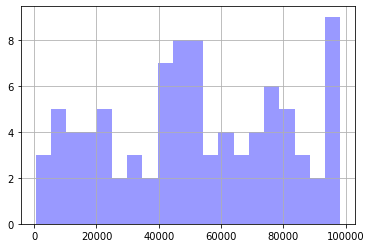

In [155]:
df['money'].hist(alpha=0.4,color='blue',bins=20)

Next lets build a function that computes the interest for a single account, and the proportion that is smaller than a penny and skim that.

In [156]:
# execute this code block to prototype the function
def add_interest(current_value,daily_rate):
    compounding_amount = current_value*daily_rate      # compute compounding amount.
    whole_dollar_ammount = current_value*daily_rate//1 # compute compounding amount whole dollar portion
    fractional_dollar_amount = compounding_amount - whole_dollar_ammount # compute compounding amount fractional dollar portion
    pennies = fractional_dollar_amount*100//1  # compute portion of fraction that are pennies
    skim = fractional_dollar_amount - pennies/100 
    output=(whole_dollar_ammount+pennies/100,skim) # return a tuple of interest to add, and amount to skim
    return(output) 

Now lets figure out how our function works, we will just take the first account and submit it to the function

In [157]:
current_value = float(accounts[0])
daily_rate = float(5/365/100)
trash = add_interest(current_value,daily_rate)
print('Account value $',accounts.item(0),' interest earned $', trash[0],'truncated amount $', trash[1])

Account value $ 4337.36  interest earned $ 0.59 truncated amount $ 0.004158904109588968


Ok so our function has two inputs and two outputs as a tuple.  We use indexing to pick the parts of the tuple corresponding to interest and skim.

Now lets simulate a single day all accounts

In [158]:
bitcoin = 0 # our ill-gotten gains account
days = 0 # our counter of how many days have elapsed
######### one day, all accounts ##############
for i in range(len(accounts)):
    accounts[i]=accounts[i]+add_interest(current_value,daily_rate)[0]
    bitcoin = bitcoin + add_interest(current_value,daily_rate)[1]
days = days + 1
print('We stole $',bitcoin, 'in ',days,' days')

We stole $ 0.3743013698630071 in  1  days


In [159]:
print('Total accounts value $',round(accounts.sum(),2))

Total accounts value $ 4642348.24


Ok we are ready to wrap the script into a while loop to keep track of days

In [160]:
accounts = 100 + (100000-100) * np.random.rand(900000,1); # Reset all the accounts
accounts = np.floor(100*accounts)/100;
startingValue = round(accounts.sum(),2)
print('Total accounts value $',startingValue)

Total accounts value $ 45093160067.12


In [ ]:
######### one day ##############
bitcoin = 0
#days = 0
daily_rate = float(5/365/100)
while days < 10:
    days += 1
    start_time = timeit.default_timer()
    for i in range(len(accounts)):
        myvalue = accounts[i]
        myname = add_interest(myvalue,daily_rate)
        accounts[i]=accounts[i]+ myname[0]
        bitcoin = bitcoin + myname[1]
    elapsed = timeit.default_timer() - start_time
    print('processed accounts in',elapsed,'seconds')
    if days == 1:
        print('We stole ',bitcoin, 'in ',days,' days')
    elif days == 10:
        print('We stole ',bitcoin, 'in ',days,' days')
    elif days == 100:
        print('We stole ',bitcoin, 'in ',days,' days')

In [164]:
myname

(array([0.16]), array([0.0056]))

Lets re-examine the histogram of the account values.  We will see if the distribution shifts upward which it should.

In [95]:
endingValue = round(accounts.sum(),2)
print('Total accounts value $',round(endingValue,2))
print('Total gain for customers $',round(endingValue-startingValue,2))
print('Total gain for thieves $',round(bitcoin,2))

Total accounts value $ 45112638325.76
Total gain for customers $ 51750000.0
Total gain for thieves $ 41560.27
